In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_json("data_result.json")

In [2]:
data.iloc[:, 1:]

,1,2
0,318,13795.408203
1,319,17696.722656
2,320,21906.691406
3,321,31327.394531
4,322,22045.845703
...,...,...
599,945,3548.992432
600,946,1085.880615
601,947,2125.424805
602,948,1724.414673


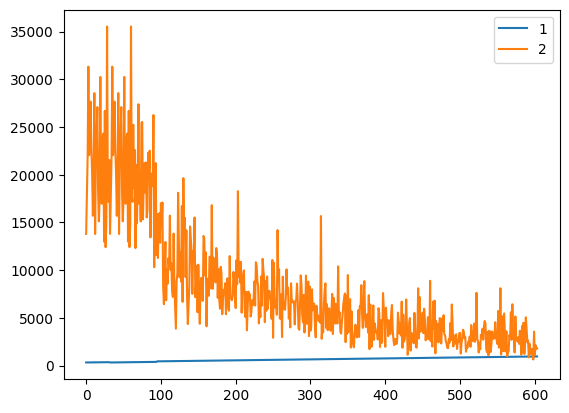

In [3]:
# Create a DataFrame with the second and third values as x and y
df = pd.DataFrame(data.iloc[:, 1:])

# Plot the data
df.plot()

# Show the plot
plt.show()

In [4]:
import glob

import pandas as pd

# Get a list of all JSON files in the directory
files = glob.glob("./versions/*.json")
files

['./versions\\version_0.json',
 './versions\\version_1.json',
 './versions\\version_10.json',
 './versions\\version_11.json',
 './versions\\version_12.json',
 './versions\\version_14.json',
 './versions\\version_15.json',
 './versions\\version_16.json',
 './versions\\version_17.json',
 './versions\\version_18.json',
 './versions\\version_20.json',
 './versions\\version_21.json',
 './versions\\version_23.json',
 './versions\\version_26.json',
 './versions\\version_29.json',
 './versions\\version_5.json',
 './versions\\version_7.json',
 './versions\\version_8.json']

In [33]:
# Initialize an empty list to hold the dataframes
dfs = []

# Load each file into a DataFrame and add it to the list
for file in files:
    data = pd.read_json(file)
    # Select the second and third values as x and y
    df = pd.DataFrame(data.iloc[:, 1:])
    df.columns = ['x', 'y']
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True).sort_values(by='x')
combined_df

,x,y
983,0,18482.990234
984,1,28357.716797
985,2,41697.449219
986,3,13788.276367
987,4,30437.451172
...,...,...
978,945,3548.992432
979,946,1085.880615
980,947,2125.424805
981,948,1724.414673


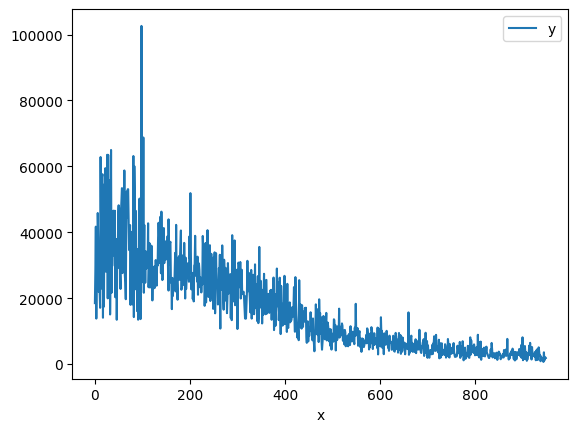

In [34]:
# Plot the data
combined_df.plot(x='x', y='y')

# Show the plot
plt.show()

In [38]:
from scipy import interpolate

# Create an interpolation function based on the data
f = interpolate.interp1d(combined_df['x'], combined_df['y'], fill_value="extrapolate")

# Use the interpolation function to predict the y-value for a given x-value
x_value = 1000  # replace with your x-value
predicted_y = f(x_value)

print(predicted_y)

5387.5899658203125


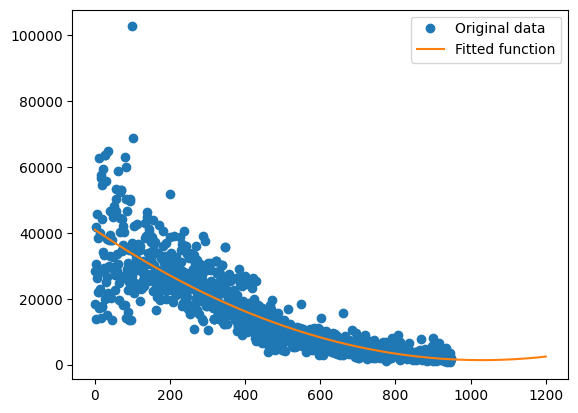

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Define the model function
def model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the model to the data
popt, pcov = curve_fit(model, combined_df['x'], combined_df['y'])

# The optimal parameters are in popt
a, b, c = popt

# Generate x-values for the fitted function
x_new = np.linspace(min(combined_df['x']), 1200, num=1000, endpoint=True)

# Compute the y-values of the fitted function
y_new = model(x_new, a, b, c)

# Plot the original data
plt.plot(combined_df['x'], combined_df['y'], 'o', label='Original data')

# Plot the fitted function
plt.plot(x_new, y_new, '-', label='Fitted function')

# Show the legend
plt.legend()

# Display the plot
plt.show()

C:\Users\oaiw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


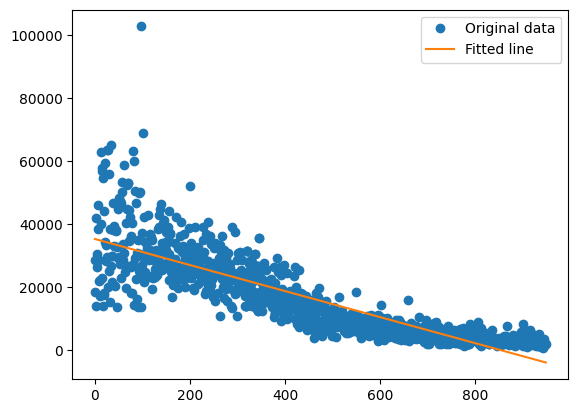

In [53]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
lr = LinearRegression()

# Fit the model to the data
lr.fit(combined_df[['x']], combined_df['y'])

# Generate x-values for the fitted line
x_new = np.linspace(min(combined_df['x']), max(combined_df['x']), num=1000, endpoint=True).reshape(-1, 1)

# Compute the y-values of the fitted line
y_new = lr.predict(x_new)

# Plot the original data
plt.plot(combined_df['x'], combined_df['y'], 'o', label='Original data')

# Plot the fitted line
plt.plot(x_new, y_new, '-', label='Fitted line')

# Show the legend
plt.legend()

# Display the plot
plt.show()

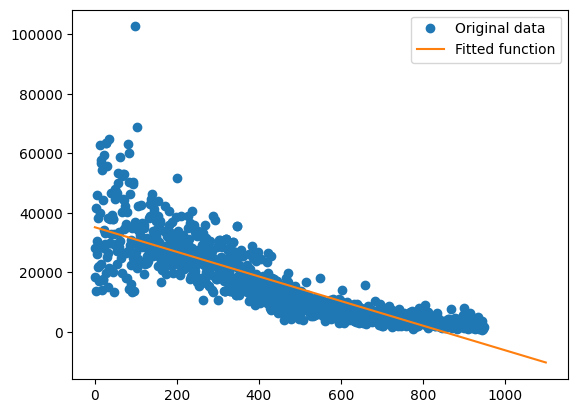

In [59]:
from scipy.optimize import curve_fit

# Define the model function
def model(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the model to the data
popt, pcov = curve_fit(model, combined_df['x'], combined_df['y'], p0=(1, 0.01, 1), maxfev=5000)

# The optimal parameters are in popt
a, b, c = popt

# Generate x-values for the fitted function
x_new = np.linspace(min(combined_df['x']), 1100, num=1000, endpoint=True)

# Compute the y-values of the fitted function
y_new = model(x_new, a, b, c)

# Plot the original data
plt.plot(combined_df['x'], combined_df['y'], 'o', label='Original data')

# Plot the fitted function
plt.plot(x_new, y_new, '-', label='Fitted function')

# Show the legend
plt.legend()

# Display the plot
plt.show()